In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
%cd gdrive/My Drive/PFE

/content/gdrive/My Drive/PFE


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torchvision
import torch.nn.functional as F
import numpy as np
from torch.utils.data import TensorDataset
from prep_dataset import *
from models.GCN_model import *
from models.GIN_model import *
from train import *

In [0]:
# Setting up the default data type
use_cuda = torch.cuda.is_available()
FloatTensor = torch.cuda.FloatTensor if use_cuda else torch.FloatTensor
device = torch.device('cuda') if use_cuda else torch.device('cpu')
dtype = torch.float64
torch.set_default_tensor_type(FloatTensor)

In [0]:
ds_name = "ENZYMES"
batch_size = 128
n_folds = 10
dataset, info = prep_dataset(ds_name)

In [0]:
learning_rate = 0.0005
num_epochs = 100
n_features = info[0]
hidden_dim = 20
n_classes = info[1]
dropout = 0.01
n_gnn_layers = 5
n_mlp_layers = 2

Percentage of class 1: 16.67%
Percentage of class 2: 16.67%
Percentage of class 3: 16.67%
Percentage of class 4: 16.67%
Percentage of class 5: 16.67%
Percentage of class 6: 16.67%


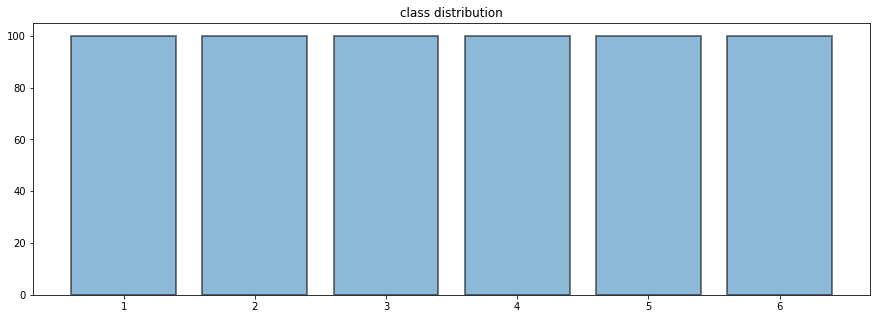

In [0]:
h_labels = dataset[:][2]
unique, counts = np.unique(h_labels.cpu(), return_counts=True)
###
for i, cl in enumerate(unique):
    print("Percentage of class {}: {:.2f}%".format(cl, 100*counts[i]/sum(counts)))
####
fig = plt.figure(figsize=(15,5))
ax = plt.axes()
ax.bar(unique, counts, align='center', alpha=0.5, edgecolor='black', linewidth=2)
ax.set_title("class distribution")
ax.set_xticks(unique)
plt.show()

Fold no. 1, epoch [0/100], Loss: 101.1216, train_acc: 20.00
Fold no. 1, epoch [10/100], Loss: 22.7270, train_acc: 18.00
Fold no. 1, epoch [20/100], Loss: 11.9187, train_acc: 27.00
Fold no. 1, epoch [30/100], Loss: 4.2183, train_acc: 31.00
Fold no. 1, epoch [40/100], Loss: 5.2512, train_acc: 31.00
Fold no. 1, epoch [50/100], Loss: 6.0988, train_acc: 29.00
Fold no. 1, epoch [60/100], Loss: 4.9756, train_acc: 32.00
Fold no. 1, epoch [70/100], Loss: 4.9199, train_acc: 33.00
Fold no. 1, epoch [80/100], Loss: 3.7481, train_acc: 34.00
Fold no. 1, epoch [90/100], Loss: 2.6018, train_acc: 34.00
Fold no. 2, epoch [0/100], Loss: 140.0581, train_acc: 19.00
Fold no. 2, epoch [10/100], Loss: 19.9513, train_acc: 19.00
Fold no. 2, epoch [20/100], Loss: 7.0602, train_acc: 26.00
Fold no. 2, epoch [30/100], Loss: 9.9868, train_acc: 28.00
Fold no. 2, epoch [40/100], Loss: 4.2936, train_acc: 31.00
Fold no. 2, epoch [50/100], Loss: 7.5133, train_acc: 34.00
Fold no. 2, epoch [60/100], Loss: 7.6342, train_acc

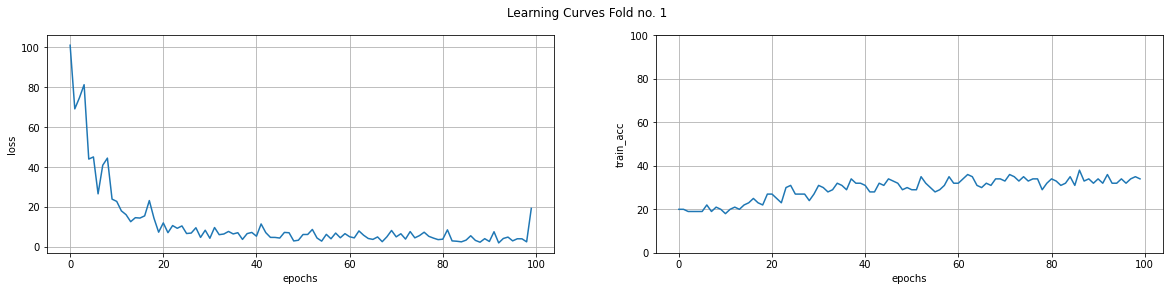

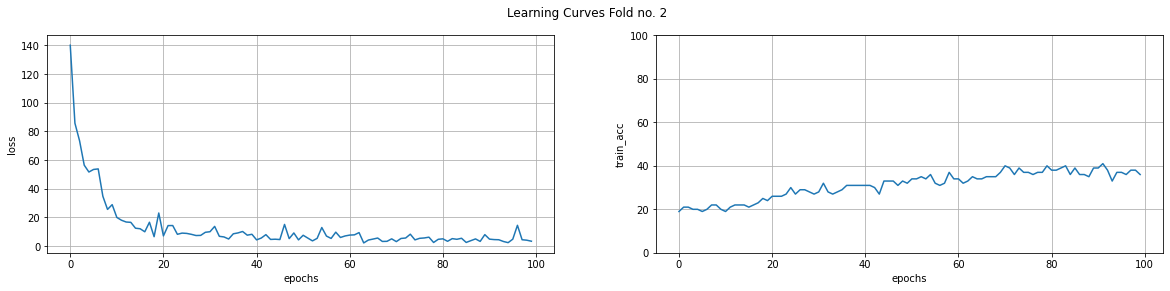

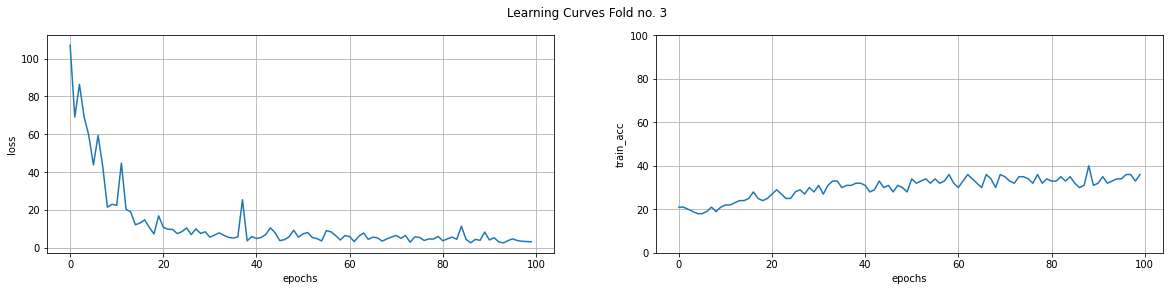

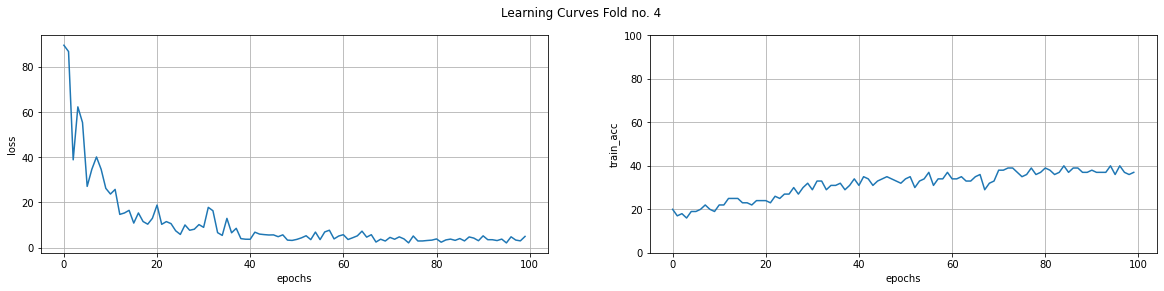

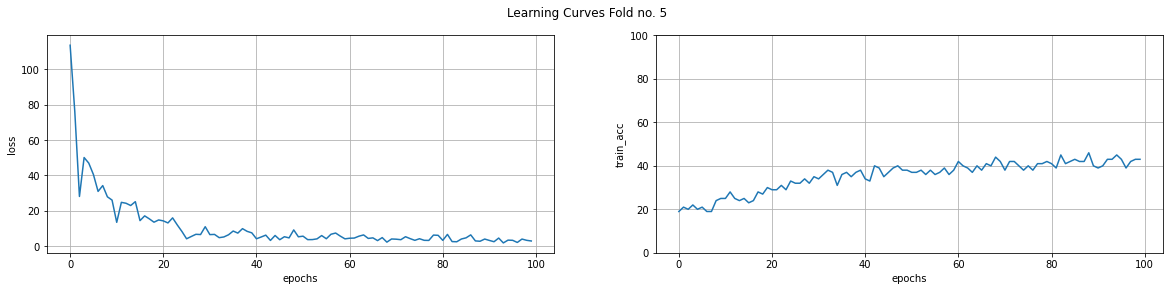

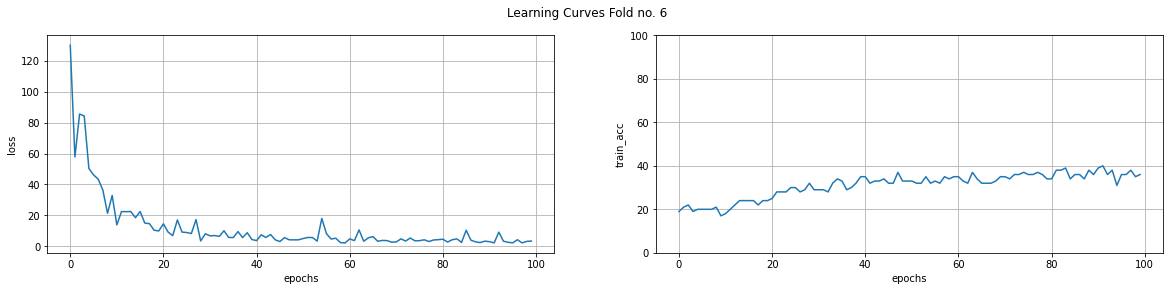

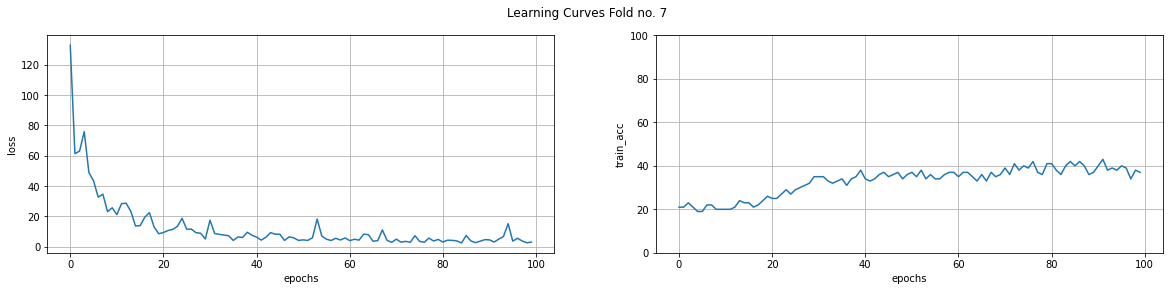

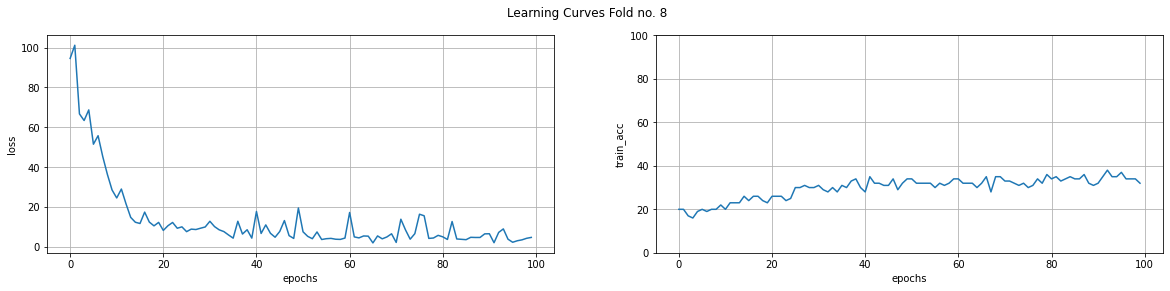

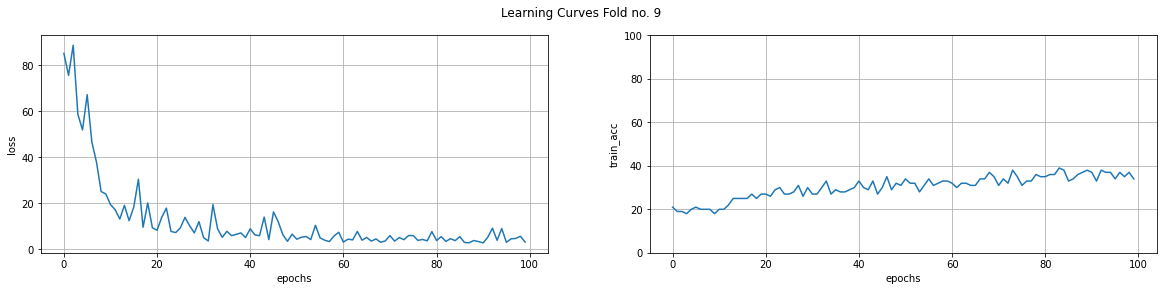

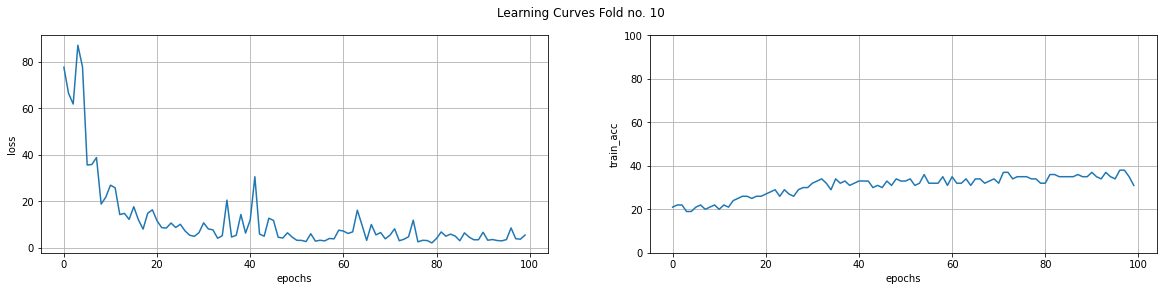

Test accuracy for each fold:
35 28 28 30 18 28 28 28 33 18
Average test accuracy across the 10 folds: 27.40
Max test accuracy across the 10 folds: 35.00


In [0]:
model = GIN(n_gnn_layers, n_mlp_layers, input_dim=n_features, hidden_dim=hidden_dim, 
            output_dim=n_classes, learn_eps=False, dropout=dropout, attention=False)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
save_name = "GIN_{}_{}_{}_{}_{}_{}_{}".format(
            ds_name, learning_rate, num_epochs, hidden_dim, dropout, n_gnn_layers, n_mlp_layers)
train_GNN(model, dataset, optimizer, criterion, num_epochs, batch_size, device, n_folds=10, start_fold=1, save_name=save_name)

Fold no. 1, epoch [0/100], Loss: 892.8427, train_acc: 16.00
Fold no. 1, epoch [10/100], Loss: 356.1494, train_acc: 12.00
Fold no. 1, epoch [20/100], Loss: 166.8922, train_acc: 15.00
Fold no. 1, epoch [30/100], Loss: 22.2444, train_acc: 16.00
Fold no. 1, epoch [40/100], Loss: 42.5952, train_acc: 19.00
Fold no. 1, epoch [50/100], Loss: 17.6318, train_acc: 21.00
Fold no. 1, epoch [60/100], Loss: 20.2323, train_acc: 18.00
Fold no. 1, epoch [70/100], Loss: 19.2837, train_acc: 19.00
Fold no. 1, epoch [80/100], Loss: 20.1761, train_acc: 20.00
Fold no. 1, epoch [90/100], Loss: 19.1409, train_acc: 19.00
Fold no. 2, epoch [0/100], Loss: 844.1102, train_acc: 15.00
Fold no. 2, epoch [10/100], Loss: 542.7525, train_acc: 11.00
Fold no. 2, epoch [20/100], Loss: 82.5328, train_acc: 16.00
Fold no. 2, epoch [30/100], Loss: 23.3580, train_acc: 17.00
Fold no. 2, epoch [40/100], Loss: 20.7025, train_acc: 17.00
Fold no. 2, epoch [50/100], Loss: 20.7031, train_acc: 16.00
Fold no. 2, epoch [60/100], Loss: 17.

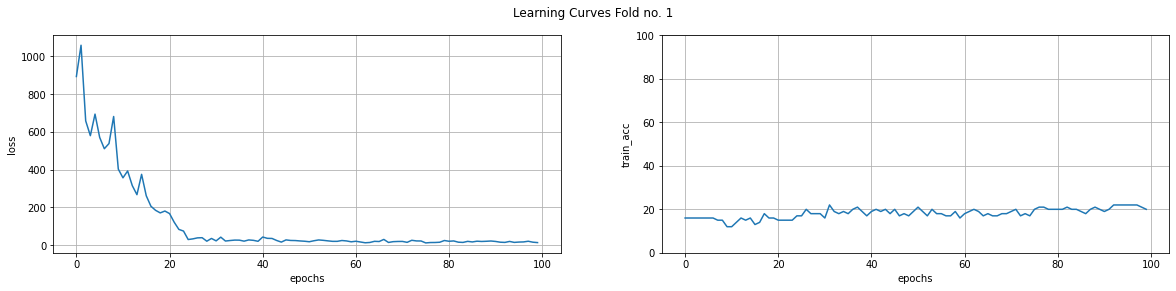

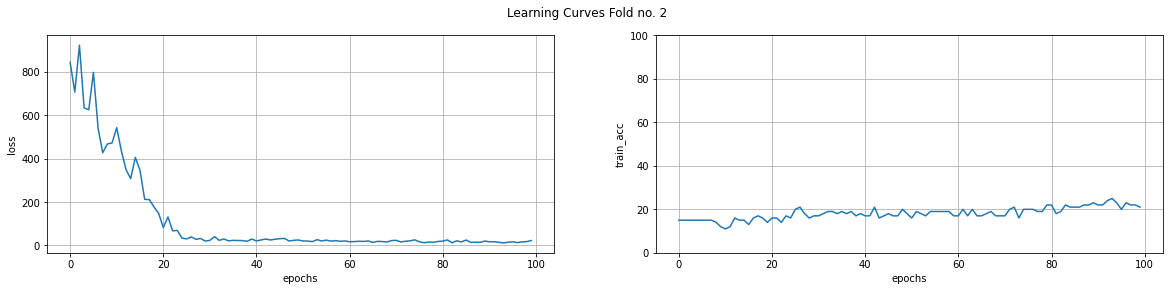

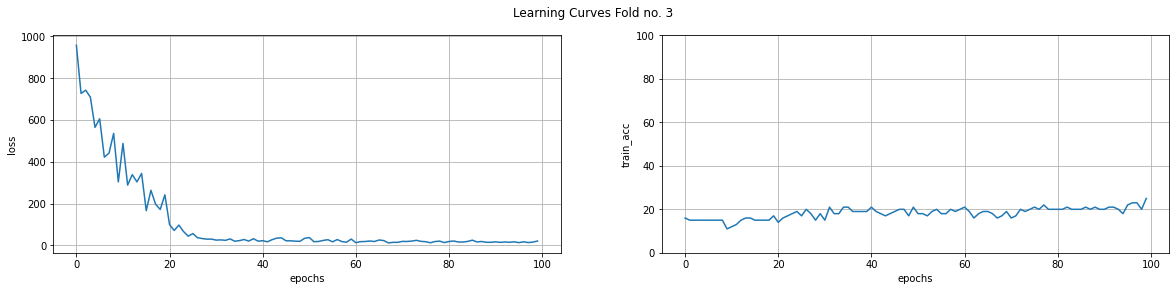

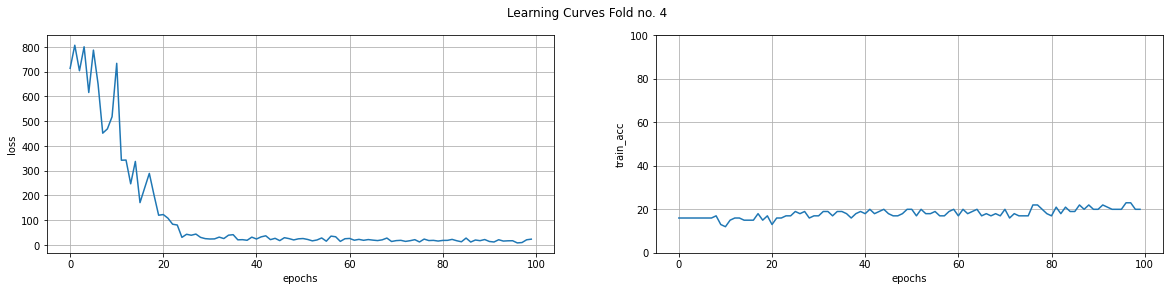

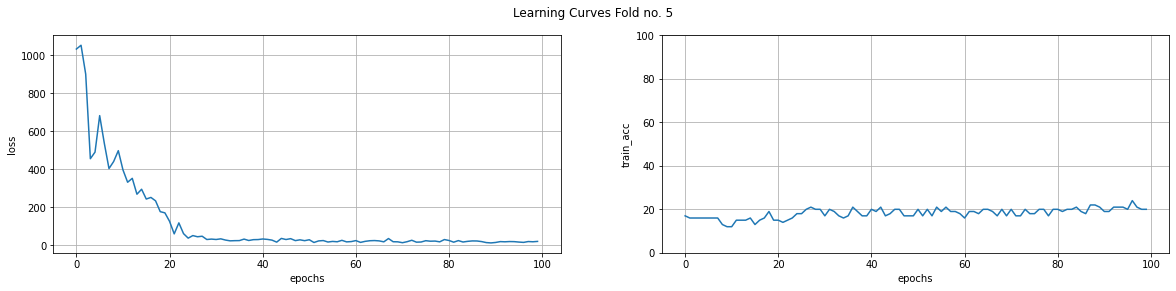

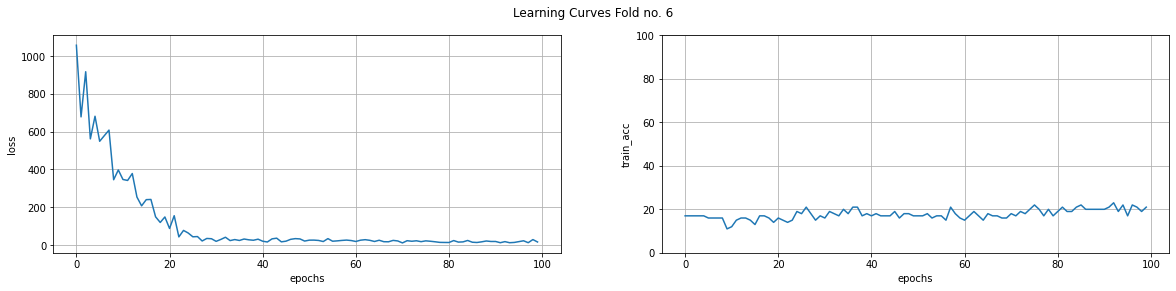

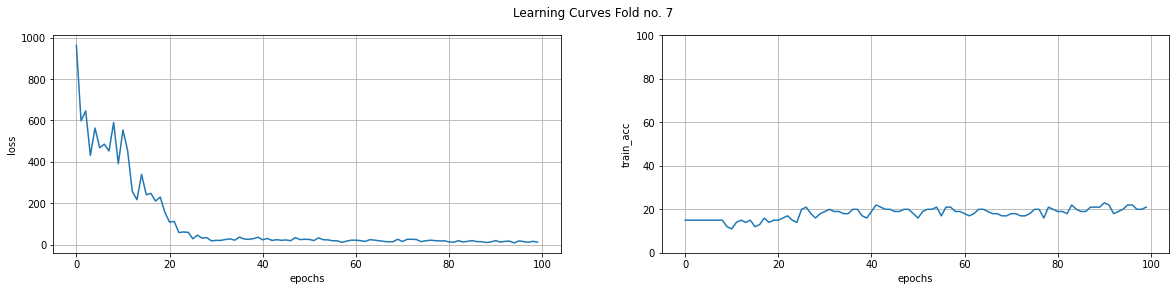

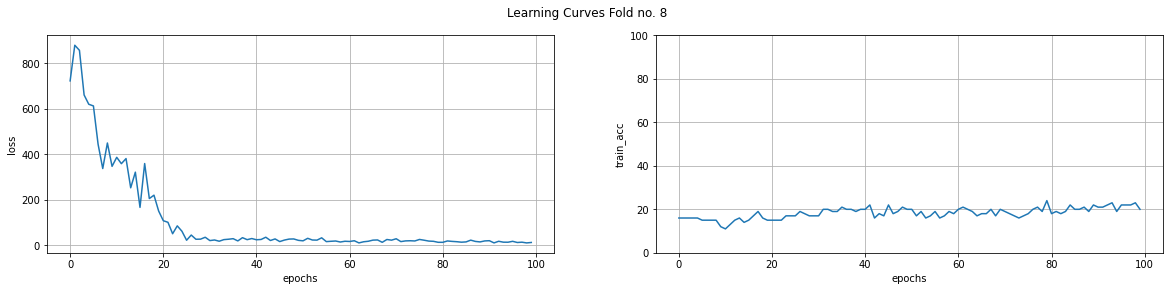

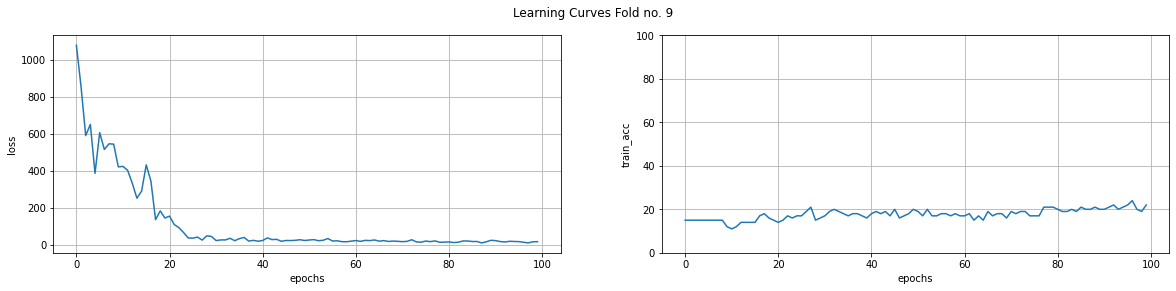

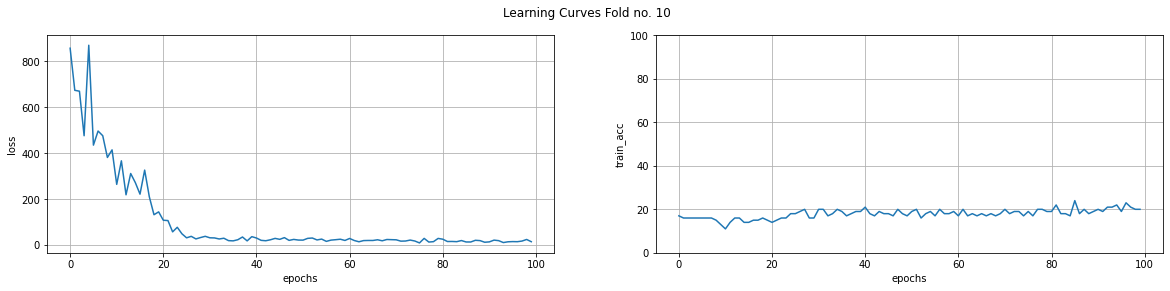

Test accuracy for each fold:
31 20 20 21 21 26 20 18 21 11
Average test accuracy across the 10 folds: 20.90
Max test accuracy across the 10 folds: 31.00


In [0]:
model = TwoLayerGCN(input_dim=n_features, hidden_dim=hidden_dim, 
                    n_classes=n_classes, dropout=dropout, attention=False)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

save_name = "GCN_{}_{}_{}_{}_{}".format(
            ds_name, learning_rate, num_epochs, hidden_dim, dropout)
train_GNN(model, dataset, optimizer, criterion, num_epochs, batch_size, device, n_folds=10, start_fold=1, save_name=save_name)

models/layers.py:94: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  scores = F.softmax(scores).flatten()


Fold no. 5, epoch [0/100], Loss: 39.5269, train_acc: 3.00
Fold no. 5, epoch [10/100], Loss: 13.5786, train_acc: 22.00
Fold no. 5, epoch [20/100], Loss: 3.8099, train_acc: 31.00
Fold no. 5, epoch [30/100], Loss: 2.6131, train_acc: 34.00
Fold no. 5, epoch [40/100], Loss: 3.3130, train_acc: 34.00
Fold no. 5, epoch [50/100], Loss: 1.9856, train_acc: 39.00
Fold no. 5, epoch [60/100], Loss: 1.7265, train_acc: 46.00
Fold no. 5, epoch [70/100], Loss: 2.5883, train_acc: 43.00
Fold no. 5, epoch [80/100], Loss: 2.3517, train_acc: 48.00
Fold no. 5, epoch [90/100], Loss: 1.2016, train_acc: 44.00
Fold no. 6, epoch [0/100], Loss: 30.9942, train_acc: 5.00
Fold no. 6, epoch [10/100], Loss: 14.6798, train_acc: 22.00
Fold no. 6, epoch [20/100], Loss: 7.2115, train_acc: 30.00
Fold no. 6, epoch [30/100], Loss: 2.9661, train_acc: 32.00
Fold no. 6, epoch [40/100], Loss: 3.3787, train_acc: 33.00
Fold no. 6, epoch [50/100], Loss: 2.2460, train_acc: 40.00
Fold no. 6, epoch [60/100], Loss: 1.4539, train_acc: 38.

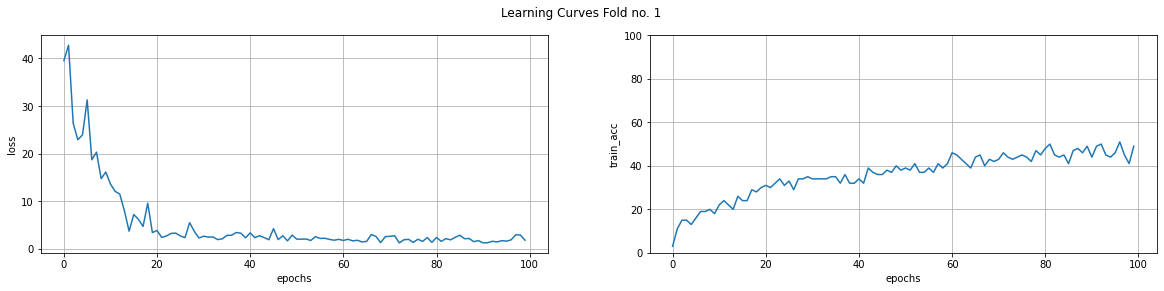

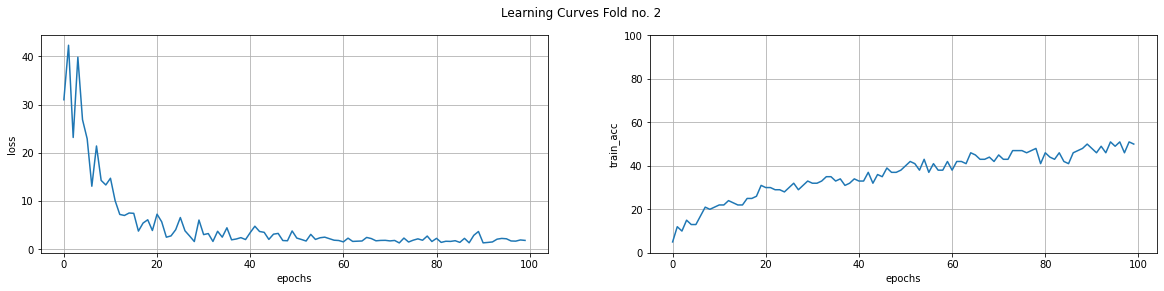

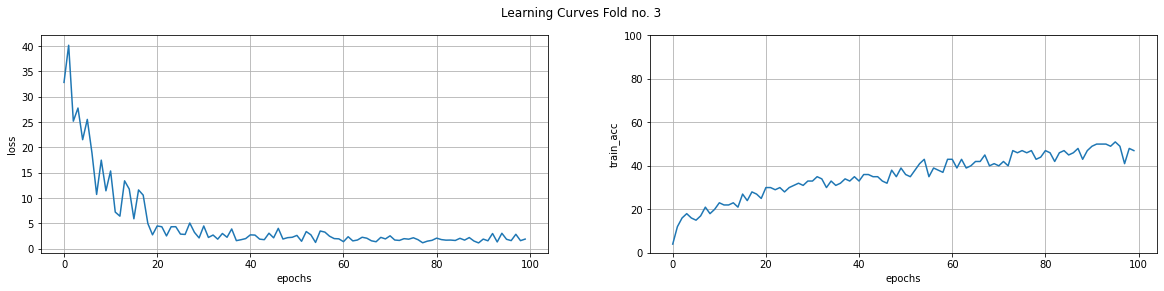

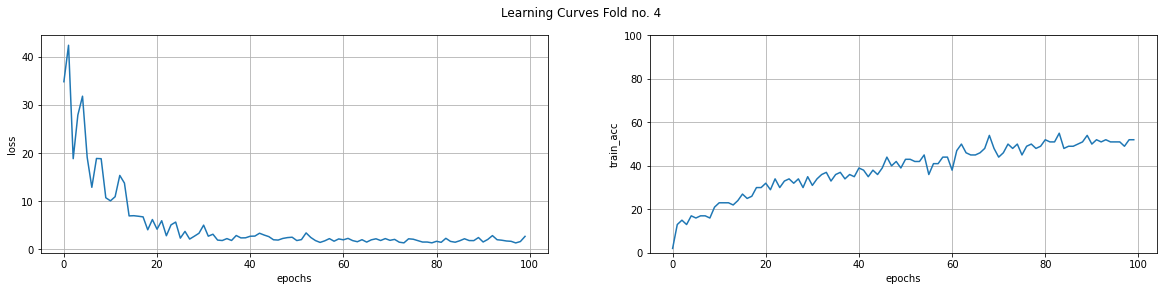

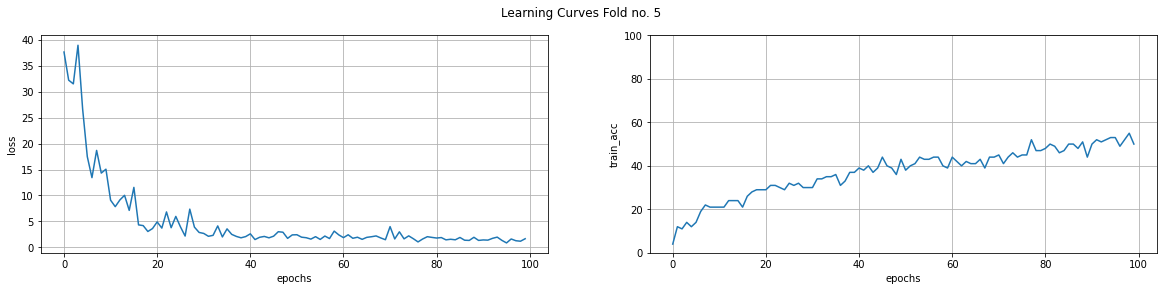

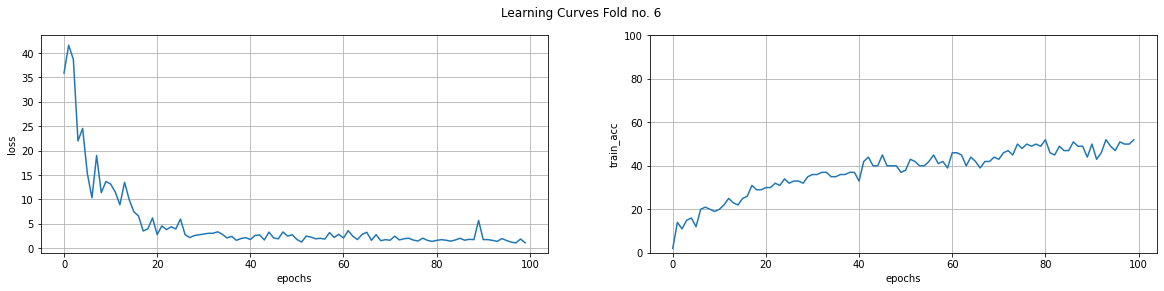

Test accuracy for each fold:
30 23 28 35 28 35
Average test accuracy across the 10 folds: 29.83
Max test accuracy across the 10 folds: 35.00


In [0]:
model = GIN(n_gnn_layers, n_mlp_layers, input_dim=n_features, hidden_dim=hidden_dim, 
            output_dim=n_classes, learn_eps=False, dropout=dropout, attention=True)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

save_name = "GINA_ENZYMES_{}_{}_{}_{}_{}_{}_{}".format(
            ds_name, learning_rate, num_epochs, hidden_dim, dropout, n_gnn_layers, n_mlp_layers)
train_GNN(model, dataset, optimizer, criterion, num_epochs, batch_size, device, n_folds=10, start_fold=5, save_name=save_name)

models/layers.py:94: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  scores = F.softmax(scores).flatten()


Fold no. 2, epoch [0/100], Loss: 603.9649, train_acc: 18.00
Fold no. 2, epoch [10/100], Loss: 98.9070, train_acc: 20.00
Fold no. 2, epoch [20/100], Loss: 45.8906, train_acc: 17.00
Fold no. 2, epoch [30/100], Loss: 23.9979, train_acc: 18.00
Fold no. 2, epoch [40/100], Loss: 16.9747, train_acc: 22.00
Fold no. 2, epoch [50/100], Loss: 19.9432, train_acc: 20.00
Fold no. 2, epoch [60/100], Loss: 10.2634, train_acc: 21.00
Fold no. 2, epoch [70/100], Loss: 11.1056, train_acc: 23.00
Fold no. 2, epoch [80/100], Loss: 14.1504, train_acc: 23.00
Fold no. 2, epoch [90/100], Loss: 9.1141, train_acc: 22.00
Fold no. 3, epoch [0/100], Loss: 278.1369, train_acc: 17.00
Fold no. 3, epoch [10/100], Loss: 65.4483, train_acc: 19.00
Fold no. 3, epoch [20/100], Loss: 102.1171, train_acc: 19.00
Fold no. 3, epoch [30/100], Loss: 19.7814, train_acc: 15.00
Fold no. 3, epoch [40/100], Loss: 14.5171, train_acc: 20.00
Fold no. 3, epoch [50/100], Loss: 22.8072, train_acc: 19.00
Fold no. 3, epoch [60/100], Loss: 12.654

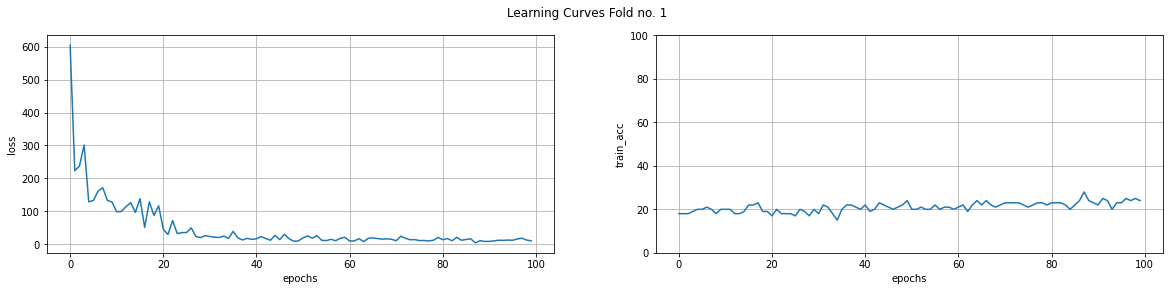

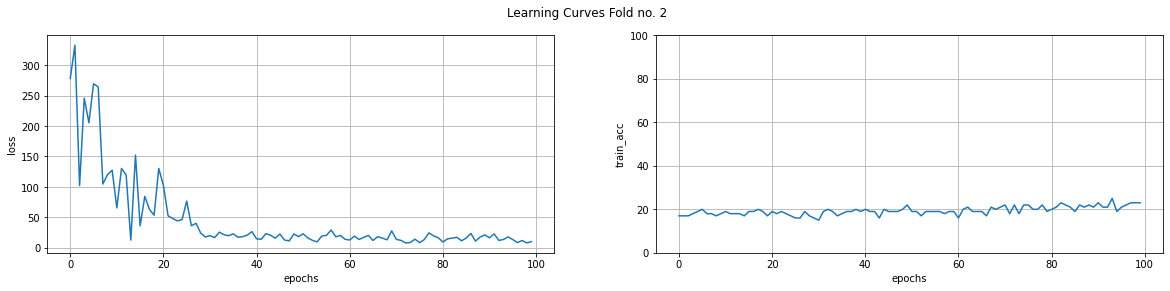

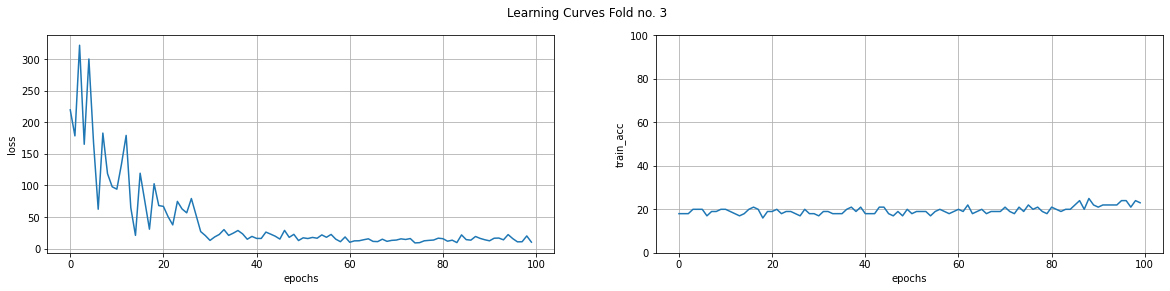

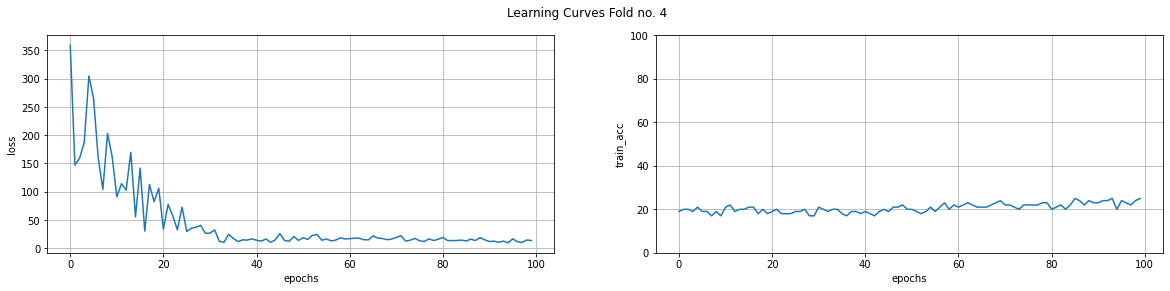

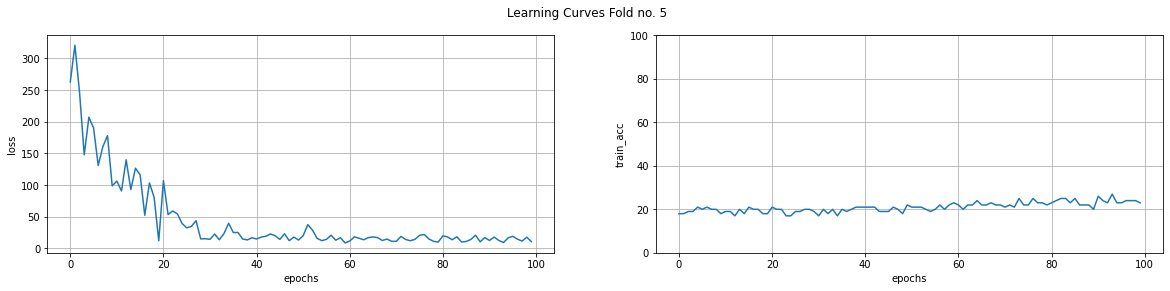

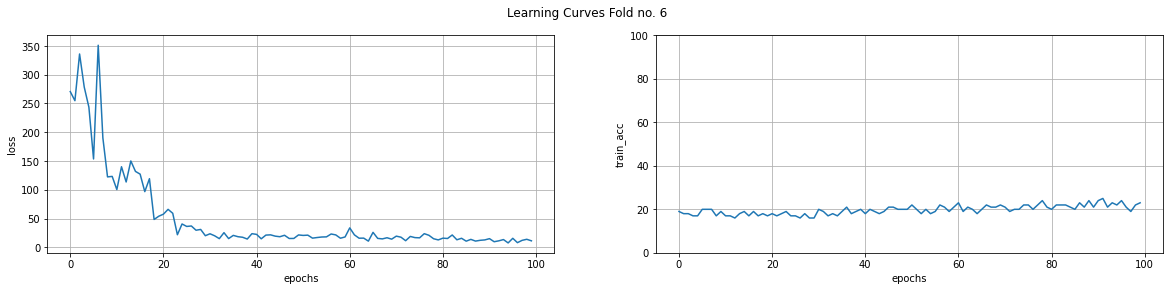

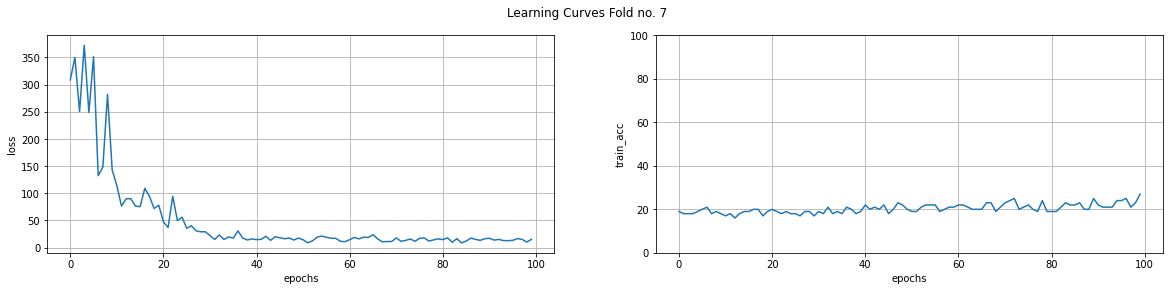

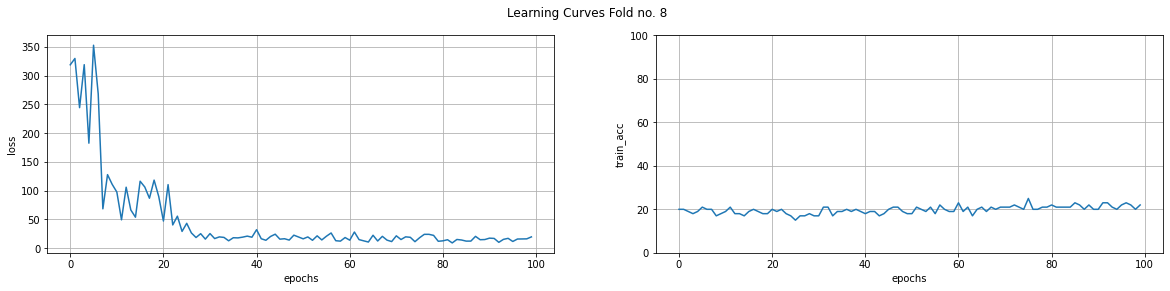

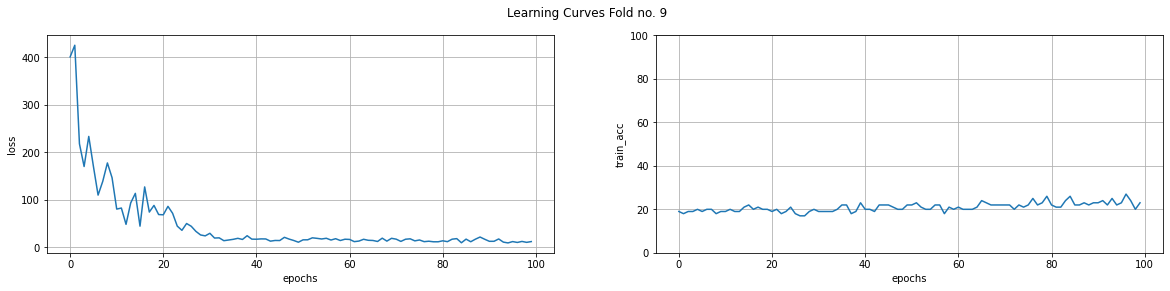

Test accuracy for each fold:
15 28 26 16 20 35 28 23 20
Average test accuracy across the 10 folds: 23.44
Max test accuracy across the 10 folds: 35.00


In [7]:
model = TwoLayerGCN(input_dim=n_features, hidden_dim=hidden_dim, 
                    n_classes=n_classes, dropout=dropout, attention=True)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

save_name = "GCNA_ENZYMES_{}_{}_{}_{}_{}".format(
            ds_name, learning_rate, num_epochs, hidden_dim, dropout)
train_GNN(model, dataset, optimizer, criterion, num_epochs, batch_size, device, n_folds=10, start_fold=2, save_name=save_name)